# 基于回归分析的大学综合得分预测
---

## 一、案例简介
大学排名是一个非常重要同时也极富挑战性与争议性的问题，一所大学的综合实力涉及科研、师资、学生等方方面面。目前全球有上百家评估机构会评估大学的综合得分进行排序，而这些机构的打分也往往并不一致。在这些评分机构中，世界大学排名中心（Center for World University Rankings，缩写CWUR）以评估教育质量、校友就业、研究成果和引用，而非依赖于调查和大学所提交的数据著称，是非常有影响力的一个。

我们将根据 CWUR 所提供的世界各地知名大学各方面的排名（师资、科研等），一方面通过数据可视化的方式观察不同大学的特点，另一方面希望构建机器学习模型（线性回归）预测一所大学的综合得分。

使用来自 Kaggle 的[数据](https://www.kaggle.com/mylesoneill/world-university-rankings?select=cwurData.csv)，构建「线性回归」模型，根据大学各项指标的排名预测综合得分。

## 三、数据概览

In [1]:
import pandas as pd
import numpy as np

data_df = pd.read_csv('./cwurData.csv')  # 读入 csv 文件为 pandas 的 DataFrame
data_df.head(3).T  # 观察前几列并转置方便观察

,0,1,2
world_rank,1,2,3
institution,Harvard University,Massachusetts Institute of Technology,Stanford University
region,USA,USA,USA
national_rank,1,2,3
quality_of_education,7,9,17
alumni_employment,9,17,11
quality_of_faculty,1,3,5
publications,1,12,4
influence,1,4,2
citations,1,4,2


去除其中包含 NaN 的数据，保留 2000 条有效记录。

In [2]:
data_df = data_df.dropna()  # 舍去包含 NaN 的 row
len(data_df)

2000

取出对应自变量以及因变量的列，之后就可以基于此切分训练集和测试集，并进行模型构建与分析。

In [3]:
feature_cols = ['quality_of_faculty', 'publications', 'citations', 'alumni_employment', 
                'influence', 'quality_of_education', 'broad_impact', 'patents']
X = data_df[feature_cols]
Y = data_df['score']
X

,quality_of_faculty,publications,citations,alumni_employment,influence,quality_of_education,broad_impact,patents
200,1,1,1,1,1,1,1.0,2
201,4,5,3,2,3,11,4.0,6
202,2,15,2,11,2,3,2.0,1
203,5,10,12,10,9,2,13.0,48
204,10,11,11,12,12,7,12.0,16
...,...,...,...,...,...,...,...,...
2195,218,926,812,567,845,367,969.0,816
2196,218,997,645,566,908,236,981.0,871
2197,218,830,812,549,823,367,975.0,824
2198,218,886,812,567,974,367,975.0,651


## 四、模型构建

In [4]:
data_df.describe()
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 200 to 2199
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   world_rank            2000 non-null   int64  
 1   institution           2000 non-null   object 
 2   region                2000 non-null   object 
 3   national_rank         2000 non-null   int64  
 4   quality_of_education  2000 non-null   int64  
 5   alumni_employment     2000 non-null   int64  
 6   quality_of_faculty    2000 non-null   int64  
 7   publications          2000 non-null   int64  
 8   influence             2000 non-null   int64  
 9   citations             2000 non-null   int64  
 10  broad_impact          2000 non-null   float64
 11  patents               2000 non-null   int64  
 12  score                 2000 non-null   float64
 13  year                  2000 non-null   int64  
dtypes: float64(2), int64(10), object(2)
memory usage: 234.4+ KB


In [5]:
mean_df = data_df.groupby('institution').mean()
top10 = mean_df.sort_values(by='score', ascending=False).head(10) 
top10

,world_rank,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
institution,,,,,,,,,,,,
Harvard University,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.5,100.000,2014.5
Stanford University,2.0,2.0,10.0,2.0,4.0,5.0,3.0,3.0,4.0,8.0,98.875,2014.5
Massachusetts Institute of Technology,3.0,3.0,3.0,11.0,2.0,15.0,2.0,2.0,2.0,1.0,98.115,2014.5
University of Cambridge,4.0,1.0,2.0,10.0,5.0,10.5,7.5,12.0,13.0,48.0,97.225,2014.5
University of Oxford,5.0,2.0,7.0,12.5,10.0,9.0,12.0,9.0,10.5,15.5,96.985,2014.5
Columbia University,6.0,4.0,13.0,7.0,9.0,13.5,13.0,10.0,12.5,4.0,96.775,2014.5
"University of California, Berkeley",7.0,5.0,4.5,21.5,6.0,8.5,4.0,3.5,7.0,28.5,92.545,2014.5
University of Chicago,8.0,6.0,10.5,14.0,8.0,17.0,17.5,11.0,20.0,145.0,91.365,2014.5
Princeton University,9.0,7.0,4.5,15.5,3.0,71.0,25.0,21.5,37.0,214.5,88.990,2014.5


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
x = top10['score'].values
print(x)
y = top10.index.values
#print(y)
sns.barplot(x, y, orient='h', palette='Reds_d')
plt.xlim(75,101)
plt.show()

[100.     98.875  98.115  97.225  96.985  96.775  92.545  91.365  88.99
  87.36 ]


C:\ProgramData\Anaconda3\envs\rs06\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<Figure size 640x480 with 1 Axes>

In [7]:
china_df = mean_df.loc[['Tsinghua University', 'Peking University'],['world_rank','national_rank','score']]
china_df

,world_rank,national_rank,score
institution,,,
Tsinghua University,82.5,2.0,52.405
Peking University,55.5,1.0,54.780


### 线性回归

In [8]:
from sklearn.model_selection import train_test_split
features = ['quality_of_education', 'alumni_employment', 'quality_of_faculty', 'publications', 'influence', 'citations', 'broad_impact', 'patents']
X = data_df[features]
Y = data_df['score']
all_x = X.values
all_y = Y.values
train_x, test_x, train_y, test_y = train_test_split(all_x, all_y, test_size = 0.2, random_state = 8)
print(len(train_x),len(test_x),len(train_y),len(test_x))

1600 400 1600 400


In [9]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_x, train_y)
predict_y = lr.predict(test_x)
rmse = ((predict_y - test_y)**2).mean()**0.5
print("The rmse is : %.6f" %(rmse))
print("The score is: %.6f" %(lr.score(test_x, test_y)))


The rmse is : 3.323036
The score is: 0.524958


查看特征系数

<class 'numpy.ndarray'>
[-6.19415960e-03 -7.23077009e-03 -6.74350593e-02  3.65660667e-04
  5.62135925e-04  4.52169195e-05 -2.41740603e-03 -2.62956690e-03]


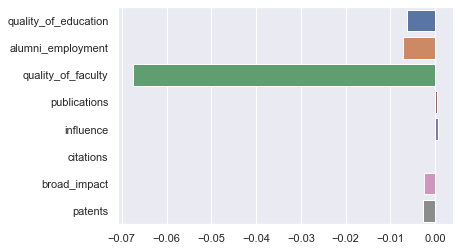

In [10]:
print(type(lr.coef_))
print(lr.coef_)
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
sns.barplot(x=lr.coef_, y=features)
plt.show()

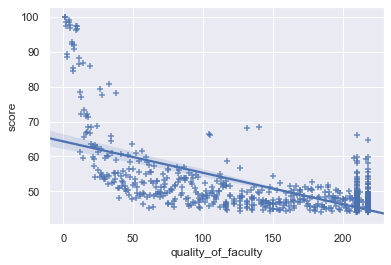

In [19]:
sns.regplot(x = 'quality_of_faculty', y = 'score', data=data_df, marker='+')

### k折交叉验证

In [92]:
kf_lr = LinearRegression()
from sklearn.model_selection import StratifiedKFold, KFold
kfold = KFold(n_splits=10, random_state=8)
#kfold = StratifiedKFold(n_splits=5, random_state=8)
sum_rmse=0
for i, (train_i, test_i) in enumerate(kfold.split(all_x, all_y)):
    kf_lr.fit(all_x[train_i], all_y[train_i])
    predict_y = kf_lr.predict(all_x[test_i])
    rmse = ((predict_y - all_y[test_i])**2).mean()**0.5
    sum_rmse += rmse
    print('%d times rmse is : %.6f ' %(i, rmse))
print("mean rmse is: %.6f " %(sum_rmse/(i+1)))

0 times rmse is : 9.117663 
1 times rmse is : 2.887568 
2 times rmse is : 1.522762 
3 times rmse is : 0.865830 
4 times rmse is : 0.745815 
5 times rmse is : 8.848204 
6 times rmse is : 3.392009 
7 times rmse is : 1.705772 
8 times rmse is : 1.347888 
9 times rmse is : 2.016745 
mean rmse is: 3.245026 


### 归一化 normalization

In [61]:
from sklearn import preprocessing
min_max = preprocessing.MinMaxScaler()
mm_all_x = min_max.fit_transform(all_x)
print(mm_all_x)
train_x, test_x, train_y, test_y = train_test_split(mm_all_x, all_y, test_size = 0.2, random_state = 8)
print(len(train_x),len(test_x),len(train_y),len(test_x))

mm_lr = LinearRegression()
mm_lr.fit(train_x, train_y)
predict_y = mm_lr.predict(test_x)
rmse = ((predict_y - test_y)**2).mean()**0.5
print("after min max scaler normalization, the rmse is: %.6f" %(rmse))
print("The score is: %.6f" %(mm_lr.score(test_x, test_y)))

[[0.         0.         0.         ... 0.         0.         0.00114943]
 [0.0273224  0.00176678 0.01382488 ... 0.00246609 0.003003   0.00574713]
 [0.00546448 0.01766784 0.00460829 ... 0.00123305 0.001001   0.        ]
 ...
 [1.         0.96819788 1.         ... 1.         0.97497497 0.94597701]
 [1.         1.         1.         ... 1.         0.97497497 0.74712644]
 [1.         1.         1.         ... 1.         0.98098098 0.62758621]]
1600 400 1600 400
after min max scaler normalization, the rmse is: 3.323036
The score is: 0.524958


### 对输入取log

In [21]:
# log input
print(all_x)
log_all_x = np.log2(all_x+1)
x_train, x_test, y_train, y_test = train_test_split(log_all_x, all_y, test_size=0.2, random_state=8)
x_train.shape, y_train.shape, x_test.shape, y_test.shape
np.isfinite(x_train).all()

[[  1.   1.   1. ...   1.   1.   2.]
 [ 11.   2.   4. ...   3.   4.   6.]
 [  3.  11.   2. ...   2.   2.   1.]
 ...
 [367. 549. 218. ... 812. 975. 824.]
 [367. 567. 218. ... 812. 975. 651.]
 [367. 567. 218. ... 812. 981. 547.]]


True

In [22]:
lr2 = LinearRegression()
lr2.fit(x_train, y_train)
predict_y2 = lr2.predict(x_test)
rmse = ((predict_y2 - test_y)**2).mean()**0.5
print("After log input, the rmse is: %.6f" %(rmse))

After log input, the rmse is: 2.211393


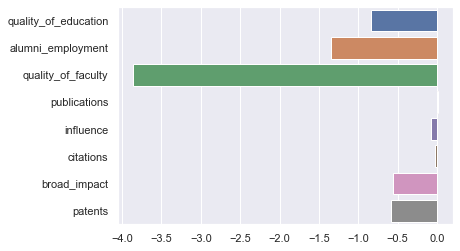

In [23]:
sns.set()
sns.barplot(x = lr2.coef_, y = features)

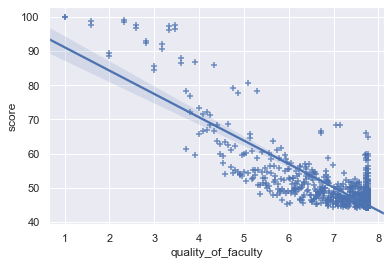

In [24]:
#log2_df = data_df[data_df[features].apply(lambda x:np.log2(x+1))]
log2_df = pd.DataFrame(log_all_x, columns = features)
log2_df.insert(0, 'score', all_y)
#print(log2_df)
sns.regplot(x = 'quality_of_faculty', y = 'score', data = log2_df, marker='+')

### 对输入取2次log

In [25]:
# double log for input
# log2_df is first log, llog2_df is second log
llog2_df = log2_df[features].apply(lambda x: np.log2(x+1))
llog_all_x = llog2_df.values
llog2_df.insert(0, 'score', all_y)

tra_x, tes_x, tra_y, tes_y = train_test_split(llog_all_x, all_y, test_size=0.2, random_state=8)
tra_x.shape, tes_x.shape, tra_y.shape, tes_y.shape

((1600, 8), (400, 8), (1600,), (400,))

In [26]:
lr3 = LinearRegression()
lr3.fit(tra_x, tra_y)
predict_y = lr3.predict(tes_x)
rmse = ((predict_y - tes_y)**2).mean()**0.5
print("rmse is : %.6f" %(rmse))

rmse is : 1.626365


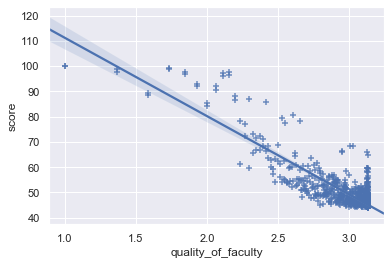

In [27]:
sns.set()
sns.regplot(x='quality_of_faculty', y='score', data=llog2_df, marker='+')

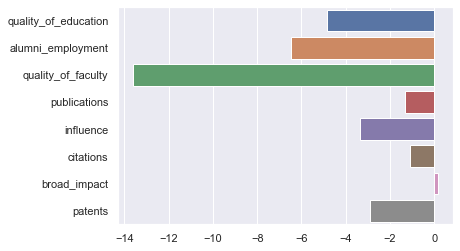

In [28]:
sns.barplot(x=lr3.coef_, y=features)

### 2次log + kfold

In [221]:
kfold = KFold(n_splits=10, random_state=8)
llkf_lr = LinearRegression()
sum_rmse = 0
for i, (train_i, test_i) in enumerate(kfold.split(llog_all_x, all_y)):
    llkf_lr.fit(llog_all_x[train_i], all_y[train_i])
    predict_y = llkf_lr.predict(llog_all_x[test_i])
    rmse = ((predict_y - all_y[test_i])**2).mean()**0.5
    print("%d times rmse is %.6f " %(i, rmse))
    sum_rmse += rmse
print("mean rmse is %.6f" %(sum_rmse/(i+1)))

0 times rmse is 4.064027 
1 times rmse is 1.390539 
2 times rmse is 0.716263 
3 times rmse is 0.546501 
4 times rmse is 0.682580 
5 times rmse is 3.973513 
6 times rmse is 1.642411 
7 times rmse is 0.892036 
8 times rmse is 0.673750 
9 times rmse is 0.814653 
mean rmse is 1.539627


### 多项式回归

In [29]:
# PolynomialFeatures
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures()
poly_all_x = poly.fit_transform(all_x)
poly_all_x.shape, all_x.shape

x_tra, x_tes, y_tra, y_tes = train_test_split(poly_all_x, all_y, test_size=0.2, random_state=8)
x_tra.shape, x_tes.shape, y_tra.shape, y_tes.shape
#poly.get_feature_names(features)
poly_df = pd.DataFrame(poly_all_x, columns=poly.get_feature_names(features))
poly_df.insert(0, 'score', all_y)

In [30]:
lr4 = LinearRegression()
lr4.fit(x_tra, y_tra)
predict_y = lr4.predict(x_tes)
rmse = ((predict_y - y_tes)**2).mean()**0.5
print('rmse is : %.6f' %(rmse))

rmse is : 2.512822


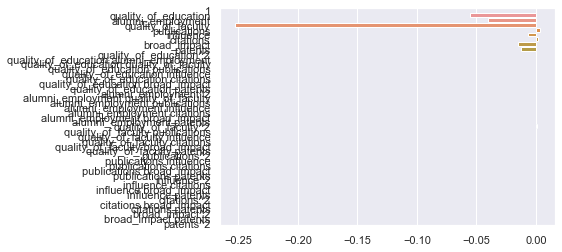

In [31]:
sns.set()
sns.barplot(x=lr4.coef_, y=poly.get_feature_names(features))

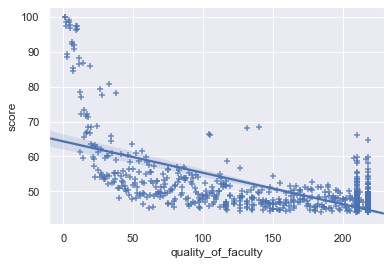

In [32]:
sns.regplot(x='quality_of_faculty', y='score', data=poly_df, marker='+')

### 多项式 + kfold

In [225]:
polykf_lr = LinearRegression()
kfold = KFold(n_splits=10, random_state=8)
sum_rmse = 0
for i, (train_i, test_i) in enumerate(kfold.split(poly_all_x, all_y)):
    polykf_lr.fit(poly_all_x[train_i], all_y[train_i])
    predict_y = polykf_lr.predict(poly_all_x[test_i])
    rmse = ((predict_y - all_y[test_i])**2).mean()**0.5
    sum_rmse += rmse
    print("%d times rmse is: %.6f" %(i, rmse))
print("mean rmse is : %.6f " %(sum_rmse/(i+1)))

0 times rmse is: 5.915857
1 times rmse is: 1.735471
2 times rmse is: 1.344629
3 times rmse is: 1.619599
4 times rmse is: 1.526595
5 times rmse is: 5.997187
6 times rmse is: 2.103670
7 times rmse is: 1.477447
8 times rmse is: 1.229652
9 times rmse is: 2.231431
mean rmse is : 2.518154 


### 查看皮尔森系数  用来去除高相关性feature的判断

In [33]:
data_df[features].corr()
#data_df[['quality_of_education', 'alumni_employment', 'quality_of_faculty','publications', 'patents']].corr()
#data_df.corr()

,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents
quality_of_education,1.000000,0.471441,0.691573,0.522428,0.549674,0.526463,0.521615,0.391934
alumni_employment,0.471441,1.000000,0.392224,0.466084,0.409959,0.446784,0.423619,0.408691
quality_of_faculty,0.691573,0.392224,1.000000,0.534627,0.564924,0.554913,0.549345,0.419068
publications,0.522428,0.466084,0.534627,1.000000,0.847979,0.792149,0.917878,0.599615
influence,0.549674,0.409959,0.564924,0.847979,1.000000,0.810993,0.916040,0.526975
citations,0.526463,0.446784,0.554913,0.792149,0.810993,1.000000,0.852638,0.508626
broad_impact,0.521615,0.423619,0.549345,0.917878,0.916040,0.852638,1.000000,0.562861
patents,0.391934,0.408691,0.419068,0.599615,0.526975,0.508626,0.562861,1.000000


### 去除broad_impact

In [45]:
p_data_df = data_df[['quality_of_education', 'alumni_employment', 'quality_of_faculty','publications', 'patents','influence','citations','patents']]
exbroad_all_x = p_data_df.values

train_x, test_x, train_y, test_y = train_test_split(exbroad_all_x, all_y, test_size=0.2, random_state=8)
train_x.shape, test_x.shape
exbroad_lr = LinearRegression()
exbroad_lr.fit(train_x, train_y)
predict_y = exbroad_lr.predict(test_x)
rmse = ((predict_y - test_y)**2).mean()**0.5
print("rmse is : %.6f" %(rmse))

rmse is : 3.329076


### 去除多项broad_impact,citations,influence

In [34]:
# 只是用下面的系数，高相关性feature删除
p_data_df = data_df[['quality_of_education', 'alumni_employment', 'quality_of_faculty','publications', 'patents']]
part_all_x = p_data_df.values

train_x, test_x, train_y, test_y = train_test_split(part_all_x, all_y, test_size=0.2, random_state=8)
train_x.shape, test_x.shape

((1600, 5), (400, 5))

In [35]:
lr5 = LinearRegression()
lr5.fit(train_x, train_y)
predict_y = lr5.predict(test_x)
rmse = ((predict_y - test_y)**2).mean()**0.5
print("rmse is : %.6f" %(rmse))

rmse is : 3.336093


### 同样去除broad_impact,citations,influence相关feature后，使用多项式方法

In [36]:
poly2 = PolynomialFeatures()
p2_all_x = poly2.fit_transform(part_all_x)

train_x, test_x, train_y, test_y = train_test_split(p2_all_x, all_y, test_size=0.2, random_state=8)
train_x.shape, test_x.shape

lr6 = LinearRegression()
lr6.fit(train_x, train_y)
predict_y = lr6.predict(test_x)
rmse = ((predict_y - test_y)**2).mean()**0.5
print("rmse is : %.6f" %(rmse))

rmse is : 2.555505


### 使用岭回归

In [46]:
# Ridge
from sklearn.linear_model import Ridge
Ridge_all_x = data_df[features]
train_x, test_x, train_y, test_y = train_test_split(Ridge_all_x, all_y, test_size=0.2, random_state=8)
ridge = Ridge()
ridge.fit(train_x, train_y)
predict_y = ridge.predict(test_x)
rmse = ((predict_y - test_y)**2).mean()**0.5
print("rmse is : %.6f" %(rmse))

rmse is : 3.323036


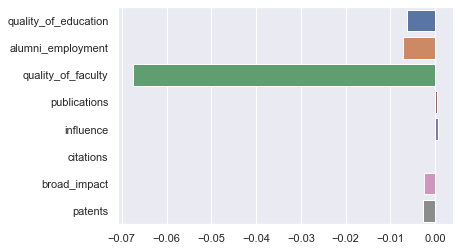

In [38]:
sns.set()
sns.barplot(x=ridge.coef_, y=features)

### 将数据多项式后使用岭回归

In [50]:
# Ridge and poly2

all_x = data_df[features].values
train_x, test_x, train_y, test_y = train_test_split(p2_all_x, all_y, test_size=0.2, random_state=8)
ridge = Ridge()
ridge.fit(train_x, train_y)
predict_y = ridge.predict(test_x)
rmse = ((predict_y - test_y)**2).mean()**0.5
print("rmse is : %.6f" %(rmse))

rmse is : 2.555502


### Lasso 回归

In [53]:
from sklearn.linear_model import Lasso
all_x = data_df[features].values
train_x, test_x, train_y, test_y = train_test_split(all_x, all_y, test_size=0.2, random_state=8)
lasso = Lasso()
lasso.fit(train_x, train_y)
predict_y = lasso.predict(test_x)
rmse = ((predict_y - test_y)**2).mean()**0.5
print("rmse is : %.6f" %(rmse))

rmse is : 3.315492


### 引入region，并one-hot encoder

In [40]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
oh_df = data_df[features]
region_array = enc.fit_transform(data_df['region'].values.reshape(-1,1)).toarray()
#print(region_array)
region_features = enc.get_feature_names()
oh_df = pd.DataFrame(region_array, columns=region_features)
#print(oh_df)
new_df = data_df[features]


In [41]:
#print(oh_df)
all_x = oh_df.values
train_x, test_x, train_y, test_y = train_test_split(all_x, all_y, test_size=0.2, random_state=8)
train_x.shape, test_x.shape

lr_oh = LinearRegression()
lr_oh.fit(train_x, train_y)
predict_y = lr_oh.predict(test_x)
rmse = ((predict_y - test_y)**2).mean()**0.5
print("rmse is : %.6f" %(rmse))

rmse is : 4.763894


### region one hot encoder 并 normalization

In [56]:
mm_all_x = min_max.fit_transform(all_x)
train_x, test_x, train_y, test_y = train_test_split(mm_all_x, all_y, test_size=0.2, random_state=8)
train_x.shape, test_x.shape
lr_oh_mm = LinearRegression()
lr_oh_mm.fit(train_x, train_y)
predict_y = lr_oh_mm.predict(test_x)
rmse = ((predict_y - test_y)**2).mean()**0.5
print("rmse is : %.6f" %(rmse))

rmse is : 3.323036


各个实现方式的rmse：

method | rmse |
 :------- | :------- |
线性回归的rmse|3.323 |
线性回归kfold,k=10的平均rmse|                          3.24|  
Min Max scaler normalization rmse|                   3.320|  
对输入取一次log的rmse|                                 2.21|  
对输入取二次log的rmse|                                 1.626|  
对输入取二次log并kfold,k=10的rmse|                     1.539|  
多项式回归的rmse|                                      2.513|  
多项式回归并kfold,k=10的rmse|                          2.518|  
去除broad_impact的rmse|                               3.329|  
去除broad_impact,citations,influence的rmse|           3.34|  
去除broad_impact,citations,influence使用多项式的rmse|  2.5555|  
使用岭回归的rmse|                                      3.32|  
使用多项式+岭回归的rmse|                                2.5555|  
使用Lasso回归的rmse|                                   3.315|  
引入region并onehot encoder的rmse|                      4.76|  
引入region并onehot encoder并normalization的rmse|       3.32|  

----------------------------------------------------------------  
Normalization，去除相关项,岭回归，引入region对最后的拟合并没有太多帮助，
对输入log,二项式对最后的拟合有明显帮助。



### 强强联手之：double log + poly

In [59]:
llog2_df = log2_df[features].apply(lambda x: np.log2(x+1))
llog_all_x = llog2_df.values
poly_ll = PolynomialFeatures()
polyll_all_x = poly.fit_transform(llog_all_x)
llog2_df.insert(0, 'score', all_y)

tra_x, tes_x, tra_y, tes_y = train_test_split(polyll_all_x, all_y, test_size=0.2, random_state=8)
tra_x.shape, tes_x.shape, tra_y.shape, tes_y.shape

pll_lr = LinearRegression()
pll_lr.fit(tra_x, tra_y)
predict_y = pll_lr.predict(tes_x)
rmse = ((predict_y - tes_y)**2).mean()**0.5
print("rmse is : %.6f" %(rmse))

rmse is : 1.453917


### 强强联手之：double log + poly + kfold

In [220]:
dlpk_lr = LinearRegression()
kfold = KFold(n_splits=10, random_state=5)
sum_rmse = 0
for i, (train_i, test_i) in enumerate(kfold.split(polyll_all_x, all_y)):
    dlpk_lr.fit(polyll_all_x[train_i], all_y[train_i])
    predict_y = dlpk_lr.predict(polyll_all_x[test_i])
    rmse = ((predict_y - all_y[test_i])**2).mean()**0.5
    print("%d times rmse is: %.6f " %(i, rmse))
    sum_rmse += rmse
print("the rmse is : %.6f" %(sum_rmse/(i+1)))

0 times rmse is: 3.690300 
1 times rmse is: 6.742875 
2 times rmse is: 3.384794 
3 times rmse is: 2.097857 
4 times rmse is: 2.915001 
5 times rmse is: 18.946335 
6 times rmse is: 5.041621 
7 times rmse is: 3.262119 
8 times rmse is: 2.219850 
9 times rmse is: 3.553488 
the rmse is : 5.185424


## double log + poly 的效果最好， rmse为1.454